<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/cnn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [2]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
  plt.figure(figsize=(6, 6))
  for i in range(nb_samples):
    plt.subplot(nb_row, nb_row, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

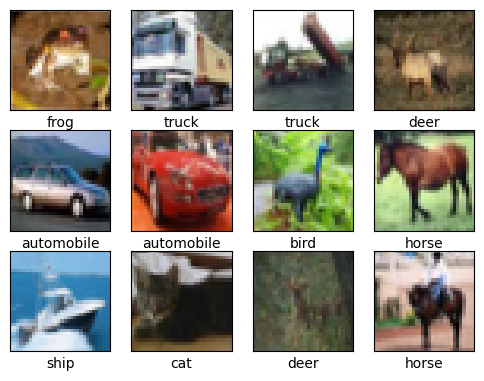

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
show_images(train_images, class_names, train_labels)

In [5]:
# Normalize the pixel values in the same range (e.g. 0 to 1).
# This is a common preprocessing step when dealing with images.
# Helps with faster convergence during the training.
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [6]:
# The labels are represented as cat, horse, bird, and so on.
# We need to convert them into a numerical format so that they can be
#easily processed by the neural network.
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

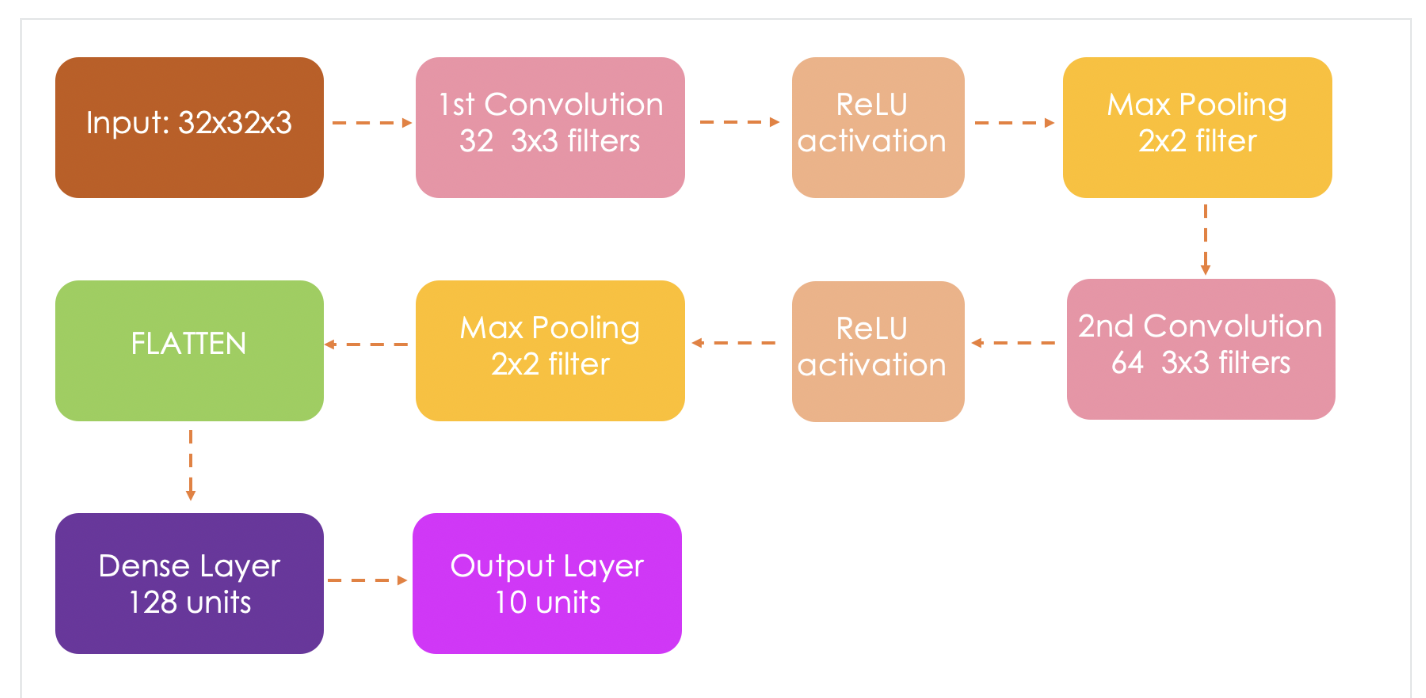

In [8]:
# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

In [9]:
# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
## May need GPU, otherwise it will take very long to train
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 10

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4021 - loss: 1.6415 - precision: 0.6466 - recall: 0.1591 - val_accuracy: 0.5899 - val_loss: 1.1735 - val_precision: 0.7373 - val_recall: 0.4310
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6080 - loss: 1.1135 - precision: 0.7553 - recall: 0.4527 - val_accuracy: 0.6365 - val_loss: 1.0393 - val_precision: 0.7572 - val_recall: 0.5124
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6702 - loss: 0.9537 - precision: 0.7848 - recall: 0.5464 - val_accuracy: 0.6352 - val_loss: 1.0530 - val_precision: 0.7444 - val_recall: 0.5276
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7095 - loss: 0.8398 - precision: 0.8061 - recall: 0.6058 - val_accuracy: 0.6860 - val_loss: 0.9194 - val_precision: 0.7768 - val_recall: 0.6026
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7328 - loss: 0.7608 - precision: 0.8205 - recall: 0.6455 - val_accuracy: 0.6756 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


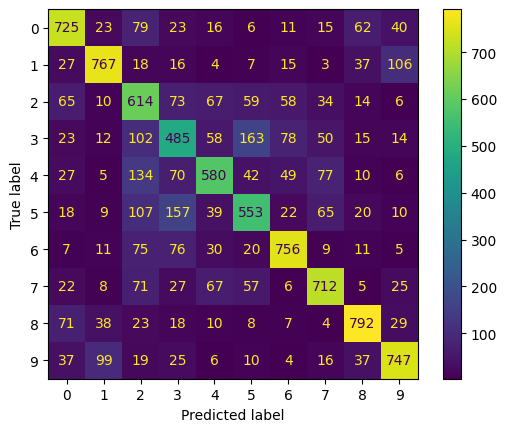

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()